# Árvores II - Tarefa I

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

#### Carregando bibliotecas

Aqui carrego as bibliotecas a serem utilizadas como ***pandas*** mara manusear o dataframe, ***scikit*** learn para modelar a arvore, ***numpy*** para algumas funções matematicas e ***matplot*** para plotar o grafico do
```ccp_alpha```

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

- Carregando os dados de *features* e alocando seu index corretamente

In [20]:
features = pd.read_csv('./input/features.txt', sep=r'\s+', header=None, names=['index', 'feature'])
features = features['feature']
features.index += 1

- Carregando as bases *subject_train.txt* e *X_train*, criando uma nova variavel chamada subject e transformando ela em um index composto.

In [21]:
subject_train = pd.read_csv('./input/train/subject_train.txt', sep=r'\s+', header=None, names=['subject'])
X_train = pd.read_csv('./input/train/X_train.txt', sep=r'\s+', header=None)

X_train['subject'] = subject_train['subject']

X_train.columns = list(features) + ['subject']

X_train.set_index(['subject', X_train.index], inplace=True)

- Realizando o mesmo para a base *X_test*.

In [22]:
subject_test = pd.read_csv('./input/test/subject_test.txt', sep=r'\s+', header=None, names=['subject'])
X_test = pd.read_csv('./input/test/X_test.txt', sep=r'\s+', header=None)

X_test['subject'] = subject_test['subject']

X_test.columns = list(features) + ['subject']

X_test.set_index(['subject', X_test.index], inplace=True)

- Separando apenas as variaveis mensionadas no exercicio e salvando como csv em uma pasta separada.

In [23]:
X_train = X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
X_test = X_test[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

X_train.to_csv('./csv/train/X_train.csv', index=True)
X_test.to_csv('./csv/test/X_test.csv', index=True)

display(X_train)
display(X_test)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
subject                                                              
1       0              0.288585          -0.020294          -0.132905
        1              0.278419          -0.016411          -0.123520
        2              0.279653          -0.019467          -0.113462
        3              0.279174          -0.026201          -0.123283
        4              0.276629          -0.016570          -0.115362
...                         ...                ...                ...
30      7347           0.299665          -0.057193          -0.181233
        7348           0.273853          -0.007749          -0.147468
        7349           0.273387          -0.017011          -0.045022
        7350           0.289654          -0.018843          -0.158281
        7351           0.351503          -0.012423          -0.203867

[7352 rows x 3 columns]

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
subject                                                              
2       0              0.257178          -0.023285          -0.014654
        1              0.286027          -0.013163          -0.119083
        2              0.275485          -0.026050          -0.118152
        3              0.270298          -0.032614          -0.117520
        4              0.274833          -0.027848          -0.129527
...                         ...                ...                ...
24      2942           0.310155          -0.053391          -0.099109
        2943           0.363385          -0.039214          -0.105915
        2944           0.349966           0.030077          -0.115788
        2945           0.237594           0.018467          -0.096499
        2946           0.153627          -0.018437          -0.137018

[2947 rows x 3 columns]

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

- Carregando as bases da variavel respostas que ja vem separadas como ***y_train*** e ***y_test***

In [24]:
y_train = pd.read_csv('./input/train/y_train.txt', sep=r'\s+', header=None, names=['activity'])
y_test = pd.read_csv('./input/test/y_test.txt', sep=r'\s+', header=None, names=['activity'])

- Treinando uma arvore com um minimo de 20 observações por folha para cada valor de ```ccp_alpha```

In [25]:
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=4)
clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

# ccp_alphas = ccp_alphas[::5]

### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

- Rodando uma arvore para cada ```ccp_alpha``` e salvando em uma lista, calculando sua acuracia nas base treino e teste para visualizar atraves de um grafico.

In [26]:
%%time

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=ccp_alpha, random_state=4).fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

CPU times: total: 7.56 s
Wall time: 8.43 s


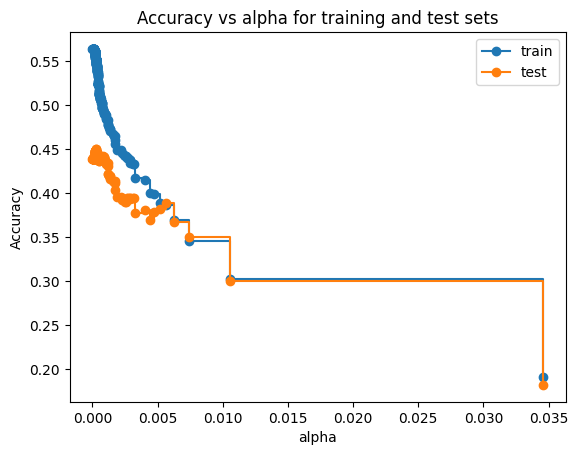

In [27]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and test sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

- Com base nad 3 variaveis selecionadas, o melhor ccp_alpha e o melhor resultado são informados no codigo abaixo.

In [28]:

best_tree_index = np.argmax(test_scores)

best_ccp_alpha = ccp_alphas[best_tree_index]
best_accuracy = test_scores[best_tree_index]

print(f"The best ccp_alpha is: {best_ccp_alpha}")
print(f"The best accuracy on the test set is: {best_accuracy}")

The best ccp_alpha is: 0.000261784704614439
The best accuracy on the test set is: 0.4502884289107567


---

- Como sugerido nos exercicios, faço novos testes utilizando uma maior quantidade de variaveis para tentar melhorar os resultados da acuracia na base teste e os resultados estão todos mostrados abaixo.

In [29]:
subject_train_2 = pd.read_csv('./input/train/subject_train.txt', sep=r'\s+', header=None, names=['subject'])
X_train_2 = pd.read_csv('./input/train/X_train.txt', sep=r'\s+', header=None)

X_train_2['subject'] = subject_train_2['subject']

X_train_2.columns = list(features) + ['subject']

X_train_2.set_index(['subject', X_train_2.index], inplace=True)

# display(X_train_2.head())

In [30]:
subject_test_2 = pd.read_csv('./input/test/subject_test.txt', sep=r'\s+', header=None, names=['subject'])
X_test_2 = pd.read_csv('./input/test/X_test.txt', sep=r'\s+', header=None)

X_test_2['subject'] = subject_test_2['subject']

X_test_2.columns = list(features) + ['subject']

X_test_2.set_index(['subject', X_test_2.index], inplace=True)

# display(X_test_2.head())

In [31]:
# X_train_2 = pd.read_csv('/content/csv/train/X_train.csv', index_col=[0, 1])
# X_test_2 = pd.read_csv('/content/csv/test/X_test.csv', index_col=[0, 1])

X_train_2 = X_train_2[[
        'tBodyAcc-mean()-X',
        'tBodyAcc-mean()-Y',
        'tBodyAcc-mean()-Z',
        'tGravityAcc-mean()-X',
        'tGravityAcc-mean()-Y',
        'tGravityAcc-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'fBodyAcc-mean()-X',
        'fBodyAcc-mean()-Y',
        'fBodyAcc-mean()-Z',
        'fBodyAccJerk-mean()-X',
        'fBodyAccJerk-mean()-Y',
        'fBodyAccJerk-mean()-Z',
        'fBodyAccJerk-mean()-X',
        'fBodyAccJerk-mean()-Y',
        'fBodyAccJerk-mean()-Z'
]]

X_test_2 = X_test_2[[
        'tBodyAcc-mean()-X',
        'tBodyAcc-mean()-Y',
        'tBodyAcc-mean()-Z',
        'tGravityAcc-mean()-X',
        'tGravityAcc-mean()-Y',
        'tGravityAcc-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'fBodyAcc-mean()-X',
        'fBodyAcc-mean()-Y',
        'fBodyAcc-mean()-Z',
        'fBodyAccJerk-mean()-X',
        'fBodyAccJerk-mean()-Y',
        'fBodyAccJerk-mean()-Z',
        'fBodyAccJerk-mean()-X',
        'fBodyAccJerk-mean()-Y',
        'fBodyAccJerk-mean()-Z'
]]

In [32]:
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=4)
clf.fit(X_train_2, y_train)

path = clf.cost_complexity_pruning_path(X_train_2, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

# ccp_alphas = ccp_alphas[::5]

In [33]:
%%time

# ccp_alphas = ccp_alphas[::5]

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=ccp_alpha, random_state=4).fit(X_train_2, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train_2, y_train) for clf in clfs]
test_scores = [clf.score(X_test_2, y_test) for clf in clfs]

CPU times: total: 15.3 s
Wall time: 17 s


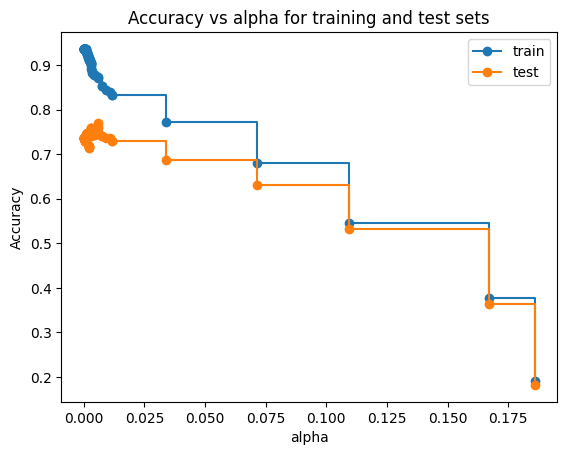

In [34]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and test sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [35]:
best_tree_index = np.argmax(test_scores)

best_ccp_alpha = ccp_alphas[best_tree_index]
best_accuracy = test_scores[best_tree_index]

print(f"The best ccp_alpha is: {best_ccp_alpha}")
print(f"The best accuracy on the test set is: {best_accuracy}")

The best ccp_alpha is: 0.005887684967182769
The best accuracy on the test set is: 0.7702748557855447


## Com isso concluo a atividade 1 do modulo 17 com todos os exercicios realizados por completo!